[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Total_Regression.ipynb)

In [0]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()
# Set a random seed
tf.set_random_seed(42)
np.random.seed(42)


In [0]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])

y_vals = np.array([x[0] for x in iris.data])

In [0]:
batch_size = 25
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [0]:
deming_numerator = tf.abs(tf.subtract(model_output, y_target))
deming_denominator = tf.sqrt(tf.add(tf.square(A),1))

loss = tf.reduce_mean(tf.truediv(deming_numerator, deming_denominator))

In [0]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.9)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[-3.8205569]] b = [[10.394823]]
Loss = 0.85957915
Step #200 A = [[-4.507277]] b = [[11.754912]]
Loss = 0.7596295
Step #300 A = [[-4.9627814]] b = [[12.806945]]
Loss = 0.55600107
Step #400 A = [[-5.8656073]] b = [[13.321241]]
Loss = 0.600583
Step #500 A = [[-6.396167]] b = [[13.872867]]
Loss = 0.7825348
Step #600 A = [[-6.700297]] b = [[14.513667]]
Loss = 0.8347285
Step #700 A = [[-6.896145]] b = [[15.115067]]
Loss = 0.49681702
Step #800 A = [[-7.5318575]] b = [[15.353459]]
Loss = 0.78834176
Step #900 A = [[-7.8251657]] b = [[15.80159]]
Loss = 0.62144655
Step #1000 A = [[-7.810656]] b = [[16.423672]]
Loss = 0.7064037
Step #1100 A = [[-8.328487]] b = [[16.615164]]
Loss = 0.6758196
Step #1200 A = [[-8.559305]] b = [[16.983442]]
Loss = 0.7843936
Step #1300 A = [[-8.986819]] b = [[17.171215]]
Loss = 0.65278107
Step #1400 A = [[-9.1304]] b = [[17.54984]]
Loss = 0.731996
Step #1500 A = [[-9.081306]] b = [[18.05404]]
Loss = 0.6920565


In [0]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

In [0]:
from jupyterthemes import jtplot


jtplot.style(theme='solarizedd')

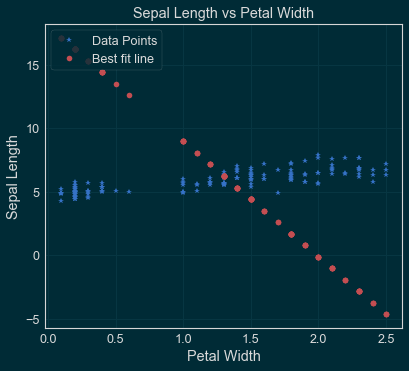

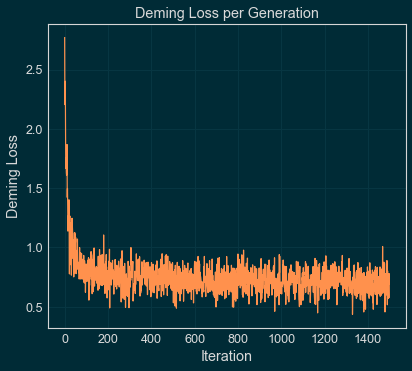

In [0]:
# Plot the result
plt.plot(x_vals, y_vals, 'b*', label='Data Points')
plt.plot(x_vals, best_fit, 'ro', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'y-')
plt.title('Deming Loss per Generation')
plt.xlabel('Iteration')
plt.ylabel('Deming Loss')
plt.show()